In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms as T
from torch.nn import functional as F


import matplotlib.pyplot as plt
import mplcyberpunk

plt.style.use("cyberpunk")
import numpy as np
import torchutils as tu
import os
import json
import torchvision

In [2]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(DEVICE)

cuda


In [3]:
def get_classes(data_dir):
    classes = sorted(os.listdir(data_dir))
    return classes

In [4]:
test_classes = get_classes("/home/artemiy/nn_project/data/seg_test/seg_test")
train_classes = get_classes("/home/artemiy/nn_project/data/seg_train/seg_train")

In [5]:
print(test_classes)
print(train_classes)


['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


In [6]:
def create_class_index(data_dir):
    classes = get_classes(data_dir)
    class_index = {i: class_name for i, class_name in enumerate(classes)}
    return class_index

In [7]:
train_dir = "/home/artemiy/nn_project/data/seg_train/seg_train"
test_dir = "/home/artemiy/nn_project/data/seg_test/seg_test"

In [8]:
train_classes = get_classes(train_dir)
test_classes = get_classes(test_dir)

In [9]:
# Создание и сохранение словаря классов
class_index = create_class_index(train_dir)
with open("class_index.json", "w") as f:
    json.dump(class_index, f)

print("Class index:", class_index)

Class index: {0: 'buildings', 1: 'forest', 2: 'glacier', 3: 'mountain', 4: 'sea', 5: 'street'}


In [10]:
labels = json.load(open("class_index.json"))
decode = lambda x: labels[str(x)] if str(x) in labels else 'Мы не знаем что это такое если бы мы знали мы не знаем что это такое'


In [11]:
# Проверка функции декодирования
for i in range(len(labels)):
    print(f"Index {i} corresponds to class {decode(i)}")

Index 0 corresponds to class buildings
Index 1 corresponds to class forest
Index 2 corresponds to class glacier
Index 3 corresponds to class mountain
Index 4 corresponds to class sea
Index 5 corresponds to class street


In [12]:
decode(15)

'Мы не знаем что это такое если бы мы знали мы не знаем что это такое'

In [13]:
from torchvision.models import Inception_V3_Weights, inception_v3
model = inception_v3(weights=Inception_V3_Weights.DEFAULT)

In [14]:
model.to(DEVICE)
tu.get_model_summary(model, torch.randn(3, 3, 299, 299, device=DEVICE))

Layer                                              Kernel              Output          Params             FLOPs
0_Conv2d_1a_3x3.Conv2d_conv                       [3, 32, 3, 3]   [3, 32, 149, 149]         864      57,544,992
1_Conv2d_1a_3x3.BatchNorm2d_bn                             [32]   [3, 32, 149, 149]          64       8,525,184
2_Conv2d_2a_3x3.Conv2d_conv                      [32, 32, 3, 3]   [3, 32, 147, 147]       9,216     597,445,632
3_Conv2d_2a_3x3.BatchNorm2d_bn                             [32]   [3, 32, 147, 147]          64       8,297,856
4_Conv2d_2b_3x3.Conv2d_conv                      [32, 64, 3, 3]   [3, 64, 147, 147]      18,432   1,194,891,264
5_Conv2d_2b_3x3.BatchNorm2d_bn                             [64]   [3, 64, 147, 147]         128      16,595,712
6_maxpool1                                                    -     [3, 64, 73, 73]           0               0
7_Conv2d_3b_1x1.Conv2d_conv                      [64, 80, 1, 1]     [3, 80, 73, 73]       5,120      81,

/home/artemiy/miniforge-pypy3/envs/artemiy/lib/python3.11/site-packages/torch/nn/modules/conv.py:456: UserWarning: Applied workaround for CuDNN issue, install nvrtc.so (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:84.)
  return F.conv2d(input, weight, bias, self.stride,


In [15]:
train_transform = T.Compose([
    T.Resize((299, 299)),
    T.RandomResizedCrop(299),
    T.RandomRotation(45),
    T.ToTensor(), 
    T.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

In [16]:
valid_transform = T.Compose(
    [
        T.Resize((299, 299)),
        T.CenterCrop(299),
        T.ToTensor(),
        T.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ]
)

In [17]:
train_dataset = datasets.ImageFolder(root=train_dir, transform=train_transform)
valid_dataset = datasets.ImageFolder(root=test_dir, transform=valid_transform)

In [18]:
train_dataset

Dataset ImageFolder
    Number of datapoints: 14034
    Root location: /home/artemiy/nn_project/data/seg_train/seg_train
    StandardTransform
Transform: Compose(
               Resize(size=(299, 299), interpolation=bilinear, max_size=None, antialias=True)
               RandomResizedCrop(size=(299, 299), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear, antialias=True)
               RandomRotation(degrees=[-45.0, 45.0], interpolation=nearest, expand=False, fill=0)
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [19]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=True)

In [20]:
train_dataset.class_to_idx

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [21]:
idx2class = {j: i for i, j in train_dataset.class_to_idx.items()}

In [22]:
idx2class

{0: 'buildings',
 1: 'forest',
 2: 'glacier',
 3: 'mountain',
 4: 'sea',
 5: 'street'}

In [23]:
len(idx2class)

6

In [24]:
model.fc = torch.nn.Linear(2048, 6)

In [25]:
model.to(DEVICE)
tu.get_model_summary(model, torch.randn(3, 3, 299, 299, device=DEVICE))

Layer                                              Kernel              Output          Params             FLOPs
0_Conv2d_1a_3x3.Conv2d_conv                       [3, 32, 3, 3]   [3, 32, 149, 149]         864      57,544,992
1_Conv2d_1a_3x3.BatchNorm2d_bn                             [32]   [3, 32, 149, 149]          64       8,525,184
2_Conv2d_2a_3x3.Conv2d_conv                      [32, 32, 3, 3]   [3, 32, 147, 147]       9,216     597,445,632
3_Conv2d_2a_3x3.BatchNorm2d_bn                             [32]   [3, 32, 147, 147]          64       8,297,856
4_Conv2d_2b_3x3.Conv2d_conv                      [32, 64, 3, 3]   [3, 64, 147, 147]      18,432   1,194,891,264
5_Conv2d_2b_3x3.BatchNorm2d_bn                             [64]   [3, 64, 147, 147]         128      16,595,712
6_maxpool1                                                    -     [3, 64, 73, 73]           0               0
7_Conv2d_3b_1x1.Conv2d_conv                      [64, 80, 1, 1]     [3, 80, 73, 73]       5,120      81,

In [26]:
for p in model.parameters():
    p.requires_grad = False

In [27]:
for param in model.parameters():
    print(param.requires_grad)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

In [28]:
model

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

In [29]:
for p in model.fc.parameters():
    p.requires_grad = True

In [30]:
for p in model.Mixed_7c.parameters():
    p.requires_grad = True

In [31]:
for p in model.parameters():
    print(p.requires_grad)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

In [32]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.002)
criterion = torch.nn.CrossEntropyLoss()

In [33]:
model.to(DEVICE)

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

In [60]:
def fit_model(
    model: nn.Module,
    epochs: int,
    optimizer: torch.optim.Optimizer,
    train_loader: DataLoader,
    valid_loader: DataLoader,
    criterion: nn.Module,
    device: torch.device,
    history=None,
) -> dict:
    """
    model: pytorch model - model to train
    epochs: int          - number of epochs
    optimizer: torch.optim.Optimizer - optimizer for training
    train_loader: DataLoader - DataLoader for training data
    valid_loader: DataLoader - DataLoader for validation data
    criterion: nn.Module - loss function
    device: torch.device - device to train on
    history: dict - dictionary to store training history
    """
    history=None
    # будем сохранять значения точности и лосса в history
    history = history or {
        "train_accs": [],
        "train_losses": [],
        "valid_accs": [],
        "valid_losses": [],
    }

    # определяем текущую эпоху обучения
    start_epoch = len(history["train_accs"])
    for epoch in range(start_epoch + 1, start_epoch + epochs + 1):
        print(f'{"-"*13} Epoch {epoch} {"-"*13}')

        model.train()
        batch_accs = []
        batch_losses = []
        for samples, labels in train_loader:

            samples = samples.to(device)
            labels = labels.to(device)

            y_pred = model(samples)

            # Используем основной выход (logits) из InceptionOutputs
            if isinstance(y_pred, tuple):
                y_pred = y_pred.logits

            # Считаем лосс
            loss = criterion(y_pred, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            batch_losses.append(loss.item())

            # сравниваем предсказания с таргетом и добавляем в
            # список значение точности
            batch_accs.append((y_pred.argmax(axis=1) == labels).cpu().numpy().mean())

        history["train_losses"].append(np.mean(batch_losses))
        history["train_accs"].append(np.mean(batch_accs))

        # Validation
        model.eval()

        batch_accs = []
        batch_losses = []
        for samples, labels in valid_loader:
            with torch.no_grad():
                y_pred = model(samples.to(device))

                # Используем основной выход (logits) из InceptionOutputs
                if isinstance(y_pred, tuple):
                    y_pred = y_pred.logits

            loss = criterion(y_pred, labels.to(device))
            batch_losses.append(loss.item())
            batch_accs.append(
                (y_pred.cpu().argmax(axis=1) == labels.cpu()).numpy().mean()
            )
        history["valid_accs"].append(np.mean(batch_accs))
        history["valid_losses"].append(np.mean(batch_losses))

        # печатаем результат

        print(
            f'train: accuracy {history["train_accs"][-1]:.4f}, loss {history["train_losses"][-1]:.4f}\n'
            f'valid: accuracy {history["valid_accs"][-1]:.4f}, loss {history["valid_losses"][-1]:.4f}'
        )
        print(f'{"-"*35}')
        print()

    return history

In [35]:
history1 = fit_model(
    model=model,
    epochs=30,
    optimizer=optimizer,
    train_loader=train_loader,
    valid_loader=valid_loader,
    criterion=criterion,
    device=DEVICE,
)

------------- Epoch 1 -------------
train: accuracy 0.7666, loss 0.6328
valid: accuracy 0.8514, loss 0.3977
-----------------------------------

------------- Epoch 2 -------------
train: accuracy 0.8043, loss 0.5296
valid: accuracy 0.8799, loss 0.3034
-----------------------------------

------------- Epoch 3 -------------
train: accuracy 0.8182, loss 0.4959
valid: accuracy 0.8863, loss 0.3097
-----------------------------------

------------- Epoch 4 -------------
train: accuracy 0.8257, loss 0.4708
valid: accuracy 0.8716, loss 0.3325
-----------------------------------

------------- Epoch 5 -------------
train: accuracy 0.8242, loss 0.4728
valid: accuracy 0.8856, loss 0.2995
-----------------------------------

------------- Epoch 6 -------------
train: accuracy 0.8273, loss 0.4691
valid: accuracy 0.8882, loss 0.2762
-----------------------------------

------------- Epoch 7 -------------
train: accuracy 0.8405, loss 0.4305
valid: accuracy 0.8968, loss 0.2772
----------------------

In [36]:
def plot_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(14, 4))

    # График значений функции потерь
    ax[0].plot(history["train_losses"], label="Train Loss")
    ax[0].plot(history["valid_losses"], label="Valid Loss")
    ax[0].set_title("Loss")
    ax[0].set_xlabel("Epoch")
    ax[0].set_ylabel("Loss")
    ax[0].legend()

    # График значений точности
    ax[1].plot(history["train_accs"], label="Train Accuracy")
    ax[1].plot(history["valid_accs"], label="Valid Accuracy")
    ax[1].set_title("Accuracy")
    ax[1].set_xlabel("Epoch")
    ax[1].set_ylabel("Accuracy")
    ax[1].legend()

    plt.show()

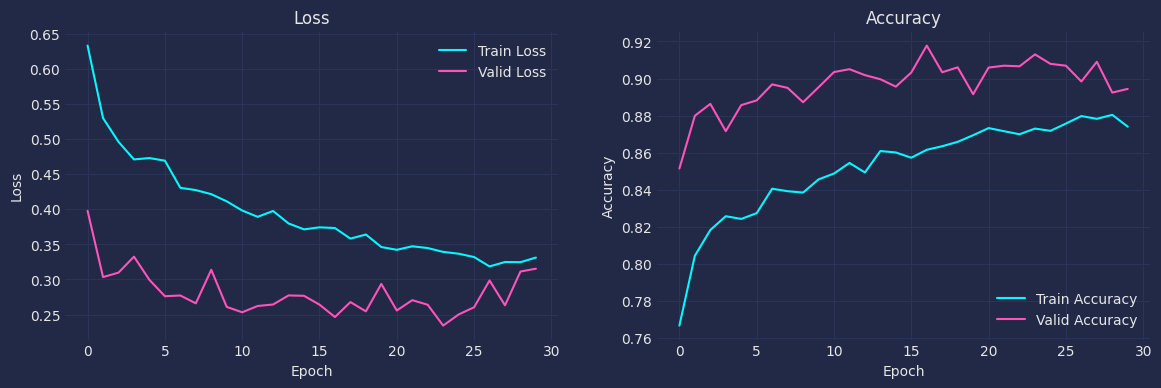

In [37]:
plot_history(history1)

In [38]:
history2 = fit_model(
    model=model,
    epochs=30,
    optimizer=optimizer,
    train_loader=train_loader,
    valid_loader=valid_loader,
    criterion=criterion,
    device=DEVICE,
)

------------- Epoch 1 -------------
train: accuracy 0.8809, loss 0.3238
valid: accuracy 0.8992, loss 0.2849
-----------------------------------

------------- Epoch 2 -------------
train: accuracy 0.8797, loss 0.3172
valid: accuracy 0.9145, loss 0.2491
-----------------------------------

------------- Epoch 3 -------------
train: accuracy 0.8832, loss 0.3133
valid: accuracy 0.9105, loss 0.2571
-----------------------------------

------------- Epoch 4 -------------
train: accuracy 0.8856, loss 0.3083
valid: accuracy 0.9204, loss 0.2440
-----------------------------------

------------- Epoch 5 -------------
train: accuracy 0.8815, loss 0.3140
valid: accuracy 0.9131, loss 0.2693
-----------------------------------

------------- Epoch 6 -------------
train: accuracy 0.8881, loss 0.3039
valid: accuracy 0.9057, loss 0.3007
-----------------------------------

------------- Epoch 7 -------------
train: accuracy 0.8839, loss 0.3101
valid: accuracy 0.9000, loss 0.3057
----------------------

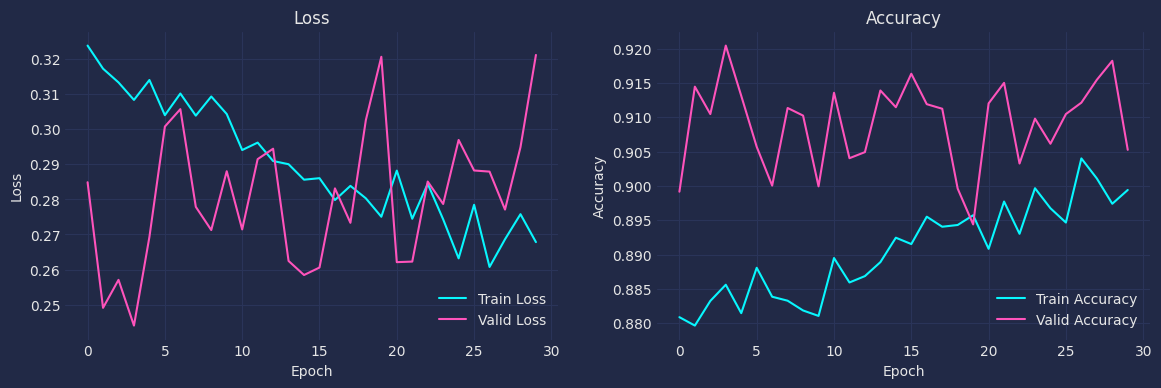

In [39]:
plot_history(history2)

In [40]:
# Сохранение модели
torch.save(model.state_dict(), "weights.pt")

In [ ]:
# from torchvision.models import Inception_V3_Weights, inception_v3

# model = inception_v3(weights=Inception_V3_Weights.DEFAULT)

In [47]:
class MyModel_7c(nn.Module):
    def __init__(self, num_classes=6):
        super(MyModel_7c, self).__init__()
        self.inception = model

        # Замораживаем все параметры модели InceptionV3
        for param in self.inception.parameters():
            param.requires_grad = False

        # Размораживаем последние несколько слоев
        for param in self.inception.Mixed_7c.parameters():
            param.requires_grad = True
        for param in self.inception.fc.parameters():
            param.requires_grad = True

        # Заменяем последний полносвязный слой на новый, адаптированный под задачу
        num_ftrs = self.inception.fc.in_features
        self.inception.fc = nn.Linear(num_ftrs, num_classes)

    def forward(self, x):
        return self.inception(x)

In [48]:
model7c = MyModel_7c()

In [50]:
model.to(DEVICE)
optimizer = torch.optim.Adam(model7c.parameters(), lr=0.002)

In [57]:
history7c = fit_model(
    model=model7c,
    epochs=30,
    optimizer=optimizer,
    train_loader=train_loader,
    valid_loader=valid_loader,
    criterion=criterion,
    device=DEVICE,
    history=None
)

------------- Epoch 1 -------------
train: accuracy 0.9106, loss 0.2392
valid: accuracy 0.9053, loss 0.3364
-----------------------------------

------------- Epoch 2 -------------
train: accuracy 0.9079, loss 0.2431
valid: accuracy 0.9157, loss 0.2868
-----------------------------------

------------- Epoch 3 -------------
train: accuracy 0.9075, loss 0.2419
valid: accuracy 0.9135, loss 0.2983
-----------------------------------

------------- Epoch 4 -------------
train: accuracy 0.9088, loss 0.2402
valid: accuracy 0.9171, loss 0.2771
-----------------------------------

------------- Epoch 5 -------------
train: accuracy 0.9088, loss 0.2383
valid: accuracy 0.9135, loss 0.3159
-----------------------------------

------------- Epoch 6 -------------
train: accuracy 0.9110, loss 0.2390
valid: accuracy 0.9176, loss 0.2984
-----------------------------------

------------- Epoch 7 -------------
train: accuracy 0.9118, loss 0.2353
valid: accuracy 0.9016, loss 0.3735
----------------------

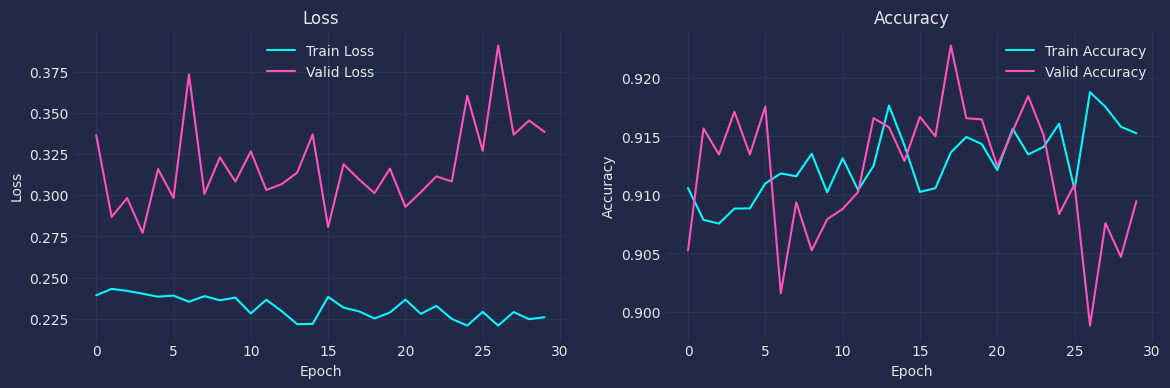

In [58]:
plot_history(history7c)

In [63]:
class MyModel_7a(nn.Module):
    def __init__(self, num_classes=6):
        super(MyModel_7a, self).__init__()
        self.inception = model

        # Замораживаем все параметры модели InceptionV3
        for param in self.inception.parameters():
            param.requires_grad = False

        # Размораживаем последние несколько слоев

        for param in self.inception.Mixed_7a.parameters():
            param.requires_grad = True
        for param in self.inception.Mixed_7b.parameters():
            param.requires_grad = True
        for param in self.inception.Mixed_7c.parameters():
            param.requires_grad = True
        for param in self.inception.fc.parameters():
            param.requires_grad = True

        # Заменяем последний полносвязный слой на новый, адаптированный под задачу
        num_ftrs = self.inception.fc.in_features
        self.inception.fc = nn.Linear(num_ftrs, num_classes)

    def forward(self, x):
        return self.inception(x)

In [64]:
model7a = MyModel_7a()
optimizer = torch.optim.Adam(model7a.parameters(), lr=0.001)
model.to(DEVICE)

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

In [65]:
history7a = fit_model(
    model=model7a,
    epochs=30,
    optimizer=optimizer,
    train_loader=train_loader,
    valid_loader=valid_loader,
    criterion=criterion,
    device=DEVICE,
    history=None,
)

------------- Epoch 1 -------------
train: accuracy 0.8100, loss 0.5324
valid: accuracy 0.9074, loss 0.2690
-----------------------------------

------------- Epoch 2 -------------
train: accuracy 0.8422, loss 0.4316
valid: accuracy 0.9118, loss 0.2548
-----------------------------------

------------- Epoch 3 -------------
train: accuracy 0.8569, loss 0.3970
valid: accuracy 0.9153, loss 0.2398
-----------------------------------

------------- Epoch 4 -------------
train: accuracy 0.8577, loss 0.3814
valid: accuracy 0.9085, loss 0.2648
-----------------------------------

------------- Epoch 5 -------------
train: accuracy 0.8632, loss 0.3767
valid: accuracy 0.9150, loss 0.2362
-----------------------------------

------------- Epoch 6 -------------
train: accuracy 0.8702, loss 0.3491
valid: accuracy 0.9101, loss 0.2389
-----------------------------------

------------- Epoch 7 -------------
train: accuracy 0.8712, loss 0.3361
valid: accuracy 0.9158, loss 0.2408
----------------------

In [1]:
plot_history(model7a)

NameError: name 'plot_history' is not defined